In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
img=cv2.imread('watch.jpg',1)
img_gray=cv2.imread('watch.jpg',0)
#IMREAD_COLOR = 1
#IMREAD_UNCHANGED = -1
#IMREAD_GRAYSCALE = 0
#cv2.imshow('image',img)
#cv2.imshow('gray',img_gray)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [11]:
img=cv2.imread('image.jpg',1)

g,b,r = cv2.split(img)
gbr_img = cv2.merge((g,b,r))
rbr_img = cv2.merge((r,b,r))

cv2.imshow('Original', img)
cv2.imshow('GRB', gbr_img)
cv2.imshow('RBR', rbr_img)
cv2.waitKey()

-1

## We will scale iamge now
We will apply reciper form cook book


In [15]:
img=cv2.imread('image.jpg',1)
scale = 0.25
img_scaled = cv2.resize(img,None,fx=0.25, fy=0.25, interpolation = cv2.INTER_LINEAR)

cv2.imshow('Scaling - Skewed Size', img_scaled)
cv2.imwrite('image.jpg',img_scaled)
cv2.waitKey()

-1

## Edge Detection 
`laplacica` and `edges`

In [17]:
img = cv2.imread('image.jpg')

laplacian = cv2.Laplacian(img,cv2.CV_64F)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

edges= cv2.Canny(img,500,500)

cv2.imshow('laplacia',laplacian)
cv2.imshow('soblx', sobelx)
cv2.imshow('soboly',sobely)
cv2.imshow('edges',edges)

cv2.waitKey()

-1

In [27]:

address = 'B:\Temp\Watch\Adamers Piguet Royal Oak Selfwinding.jpg'
value = 200
img = cv2.imread(address)
img_scaled = cv2.resize(img,None,fx=1, fy=1, interpolation = cv2.INTER_LINEAR)

edges= cv2.Canny(img_scaled,value,value)

cv2.imshow('edges',edges)

cv2.waitKey()

-1

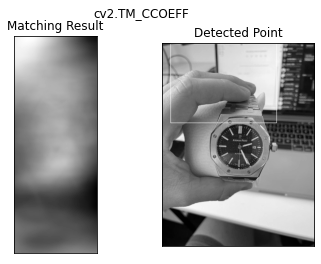

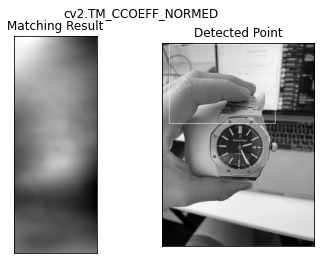

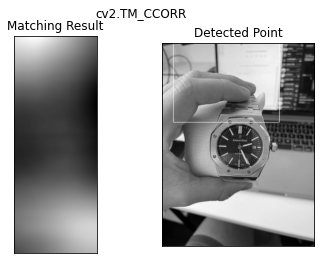

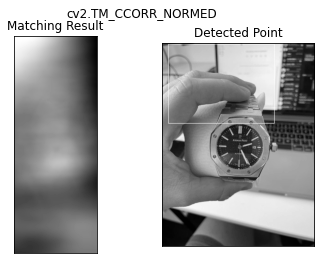

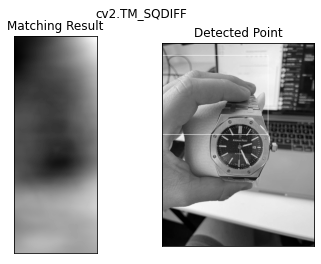

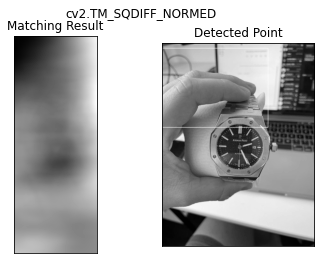

-1

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('InputImage.jpg',0)
img2 = img.copy()


template = cv2.imread('Template.jpg',0)
template = cv2.resize(template,None,fx=0.33, fy=0.33, interpolation = cv2.INTER_LINEAR)
w, h = template.shape[::-1]


# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
        
    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    
    plt.show()

cv2.waitKey()


## Key points

In [6]:
img = cv2.imread('InputImage.jpg')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)


# To detect only sharp corners
dst = cv2.cornerHarris(gray, blockSize=4, ksize=5, k=0.04)

# Result is dilated for marking the corners
dst = cv2.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image
img[dst > 0.01*dst.max()] = [0,0,0]
cv2.imshow('Harris Corners(only sharp)',img)
# to detect soft corners
dst = cv2.cornerHarris(gray, blockSize=14, ksize=5, k=0.04)
dst = cv2.dilate(dst, None)

cv2.waitKey()

-1

In [40]:
# Extract all the contours from the image
def get_all_contours(img):
    ref_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(ref_gray, 127, 255, 0)
# for the second and third parameters are restricted to a
# certain number of possible values.
    im2, contours, hierarchy = cv2.findContours(thresh.copy(),
    cv2.RETR_LIST, \
    cv2.CHAIN_APPROX_SIMPLE )
    return contours
# Extract reference contour from the image
def get_ref_contour(img):
    contours = get_all_contours(img)

    for contour in contours:
        area = cv2.contourArea(contour)
        img_area = img.shape[0] * img.shape[1]
        if 0.05 < area/float(img_area) < 0.8:
            return contour
if __name__=='__main__':
    # Boomerang reference image
    img1 = cv2.imread(sys.argv[1])
    # Input image containing all the different shapes
    img2 = cv2.imread(sys.argv[2])
    # Extract the reference contour
    ref_contour = get_ref_contour(img1)
    # Extract all the contours from the input image
    input_contours = get_all_contours(img2)
    closest_contour = None
    min_dist = None
    contour_img = img2.copy()
    cv2.drawContours(contour_img, input_contours, -1, color=(0,0,0),
    thickness=3)
    cv2.imshow('Contours', contour_img)
    # Finding the closest contour
    for contour in input_contours:
        # Matching the shapes and taking the closest one using
        # Comparison method CV_CONTOURS_MATCH_I3 (second argument)
        ret = cv2.matchShapes(ref_contour, contour, 3, 0.0)
        print("Contour %d matchs in %f" % (i, ret))
        if min_dist is None or ret < min_dist:
            min_dist = ret
            closest_contour = contour
    cv2.drawContours(img2, [closest_contour], 0 , color=(0,0,0),thickness=3)
    cv2.imshow('Best Matching', img2)
    cv2.waitKey()

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-m8us58q4\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
